In [5]:
# Required packages
import numpy as np
import pandas as pd

# Import KModes as chosen Clustering methods
!pip install kmodes
from kmodes.kmodes import KModes

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


In [20]:
df = pd.read_csv('/content/student.csv')
df

,Are you Playing Online Games?,How much time spend in gaming?,When do you play the game most of the time during the day?,Do you feel Hamper in sleep?,Do you feel the Headache?,Do you feel mental Stress?,Do you feel Depression?,Your reading attention level after the gaming?,Your Present Academic Result?
0,Sometimes,<2 hours,Mid-Night,Sometimes,Sometimes,Yes,Yes,Good,Good
1,Yes,<2 hours,Mid-Night,Sometimes,Yes,No,Yes,Good,Good
2,Yes,<2 hours,Mid-Night,No,No,No,No,Good,Good
3,Sometimes,<2 hours,Evening,No,Sometimes,Yes,Yes,Average,Average
4,Yes,<2 hours,Mid-Night,Sometimes,Sometimes,No,Sometimes,Average,Good
...,...,...,...,...,...,...,...,...,...
144,Yes,<2 hours,Afternoon,No,Yes,No,No,Good,Good
145,Yes,<2 hours,Afternoon,Yes,Yes,No,No,Bad,Average
146,Yes,<2 hours,Afternoon,No,No,No,Yes,Good,Good
147,Yes,<2 hours,Evening,No,No,Sometimes,Sometimes,Good,Good


In [21]:
df.columns

Index(['Are you Playing Online Games?', 'How much time spend in gaming?',
       'When do you play the game most of the time during the day?',
       'Do you feel Hamper in sleep?', 'Do  you feel the Headache?',
       'Do you feel mental Stress?', 'Do you feel Depression?',
       'Your reading attention level after the gaming?',
       'Your Present Academic Result? '],
      dtype='object')

In [22]:
# Rename columns for legibility
df.rename(columns={'Are you Playing Online Games?': 'Playing Games',
                   'How much time spend in gaming?': 'Game Duration',
                   'When do you play the game most of the time during the day?': 'Game Time',
                   'Do you feel Hamper in sleep?': 'Hamper Sleep',
                   'Do  you feel the Headache?': 'Headache',
                   'Do you feel mental Stress?': 'Stress',
                   'Do you feel Depression?': 'Depression',
                   'Your reading attention level after the gaming?': 'Attention Level',
                   'Your Present Academic Result? ': 'Academics'}, inplace=True)

df

,Playing Games,Game Duration,Game Time,Hamper Sleep,Headache,Stress,Depression,Attention Level,Academics
0,Sometimes,<2 hours,Mid-Night,Sometimes,Sometimes,Yes,Yes,Good,Good
1,Yes,<2 hours,Mid-Night,Sometimes,Yes,No,Yes,Good,Good
2,Yes,<2 hours,Mid-Night,No,No,No,No,Good,Good
3,Sometimes,<2 hours,Evening,No,Sometimes,Yes,Yes,Average,Average
4,Yes,<2 hours,Mid-Night,Sometimes,Sometimes,No,Sometimes,Average,Good
...,...,...,...,...,...,...,...,...,...
144,Yes,<2 hours,Afternoon,No,Yes,No,No,Good,Good
145,Yes,<2 hours,Afternoon,Yes,Yes,No,No,Bad,Average
146,Yes,<2 hours,Afternoon,No,No,No,Yes,Good,Good
147,Yes,<2 hours,Evening,No,No,Sometimes,Sometimes,Good,Good


In [23]:
# Dataset Dimensions: 149 records, 9 attributes.
df.shape

(149, 9)

In [34]:
# Check for null values
print(df.isnull().sum(), "\n")

# Check for unique values in categorical columns to identify potential invalid entries
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}'".ljust(40) + f": {df[col].unique()}")


Playing Games      0
Game Duration      0
Game Time          0
Hamper Sleep       0
Headache           0
Stress             0
Depression         0
Attention Level    0
Academics          0
dtype: int64 

Unique values in 'Playing Games'        : ['Sometimes' 'Yes' 'No']
Unique values in 'Game Duration'        : ['<2 hours' '3-4 hours' '>5 hours']
Unique values in 'Game Time'            : ['Mid-Night' 'Evening' 'Afternoon' 'Morning']
Unique values in 'Hamper Sleep'         : ['Sometimes' 'No' 'Yes']
Unique values in 'Headache'             : ['Sometimes' 'Yes' 'No']
Unique values in 'Stress'               : ['Yes' 'No' 'Sometimes']
Unique values in 'Depression'           : ['Yes' 'No' 'Sometimes']
Unique values in 'Attention Level'      : ['Good' 'Average' 'Excellent' 'Bad']
Unique values in 'Academics'            : ['Good' 'Average' 'Bad' 'Excellent']


**Global Features**

global_feature : retain all features/attributes included in original dataset

In [35]:
global_feature = df.copy()

**Selected/Filtered Features**

time_management : retain only records with feature: 'Depression' == 'No'

depression_feature : retain only records with feature: 'Depression' == 'Sometimes'/'Yes'


In [123]:
time_management = df.copy()
depression_positive = df.copy()

In [126]:
# Time Management Dataset: Filtered with Depression == No

time_management = time_management[time_management['Depression'] == 'No']
time_management

,Playing Games,Game Duration,Game Time,Hamper Sleep,Headache,Stress,Depression,Attention Level,Academics
2,Yes,<2 hours,Mid-Night,No,No,No,No,Good,Good
5,No,<2 hours,Afternoon,No,No,No,No,Good,Average
10,Yes,<2 hours,Evening,No,No,No,No,Excellent,Good
11,Yes,<2 hours,Mid-Night,No,No,No,No,Average,Good
12,No,<2 hours,Mid-Night,Yes,Yes,Sometimes,No,Bad,Bad
...,...,...,...,...,...,...,...,...,...
139,Yes,<2 hours,Evening,No,No,No,No,Excellent,Excellent
141,Yes,<2 hours,Evening,Sometimes,Sometimes,No,No,Good,Good
143,No,<2 hours,Evening,No,No,No,No,Good,Good
144,Yes,<2 hours,Afternoon,No,Yes,No,No,Good,Good


In [127]:
# Depression Positive Dataset: Filtered with Depression == Yes/Sometimes

depression_positive = depression_positive[depression_positive['Depression'].isin(['Yes', 'Sometimes'])]
depression_positive

,Playing Games,Game Duration,Game Time,Hamper Sleep,Headache,Stress,Depression,Attention Level,Academics
0,Sometimes,<2 hours,Mid-Night,Sometimes,Sometimes,Yes,Yes,Good,Good
1,Yes,<2 hours,Mid-Night,Sometimes,Yes,No,Yes,Good,Good
3,Sometimes,<2 hours,Evening,No,Sometimes,Yes,Yes,Average,Average
4,Yes,<2 hours,Mid-Night,Sometimes,Sometimes,No,Sometimes,Average,Good
6,Sometimes,<2 hours,Afternoon,Sometimes,No,Sometimes,Sometimes,Average,Good
...,...,...,...,...,...,...,...,...,...
140,Yes,<2 hours,Mid-Night,No,No,Sometimes,Sometimes,Average,Excellent
142,Yes,<2 hours,Evening,Sometimes,Yes,Yes,Sometimes,Good,Good
146,Yes,<2 hours,Afternoon,No,No,No,Yes,Good,Good
147,Yes,<2 hours,Evening,No,No,Sometimes,Sometimes,Good,Good


# Conduct K-Modes Clustering

**Workflow for conducting K-modes clustering**

1. Elbow curve to find optimal K (initialized clusters)
2. Select K-Mode initialization method: Huang, Cao (Preferred*)
3. Conduct clustering (global_feature, time_management, depression_positive)
4. Analysis & Visualization of Clustering Results



> Cao initialization method is more stable, robust towards real data despite slightly more computation (expensive).  

#**Step 1: Elbow Curve to find Optimal K**

Cost:  Sum of all the dissimilarities between the data points in the clusters.

Aim: Choosing K by comparing Cost against each K.


1. Start with a single cluster and calculate the cost.
2. Increase number of clusters (cost will decrease), until eventually gradient becomes minimal.
3. Stop at elbow point to get optimal balance & prevent overfitting.



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 626.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18, cost: 518.0
Run 1, iteration: 2/100, moves: 16, cost: 518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 24, cost: 513.0
Run 2, iteration: 2/100, moves: 2, cost

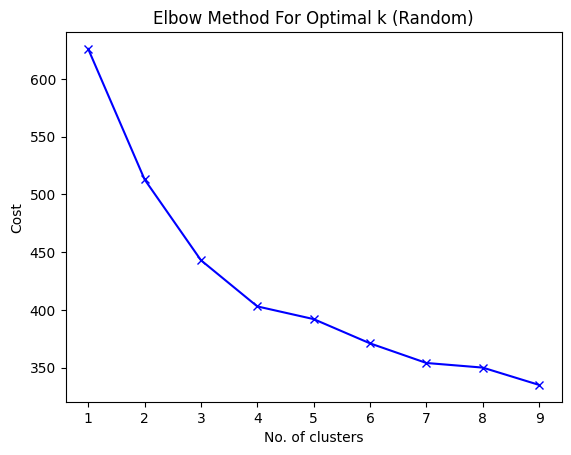

In [121]:
# Elbow curve to find optimal K (Random)
cost_random = []
K = range(1,10)

for num_clusters in list(K):
    kmode_random = KModes(n_clusters=num_clusters, init = "Random", n_init = 5, verbose=1)
    kmode_random.fit_predict(global_feature)
    cost_random.append(kmode_random.cost_)

plt.plot(K, cost_random, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k (Random)')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 626.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 520.0
Run 1, iteration: 2/100, moves: 7, cost: 520.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 29, cost: 565.0
Run 2, iteration: 2/100, moves: 3, cost:

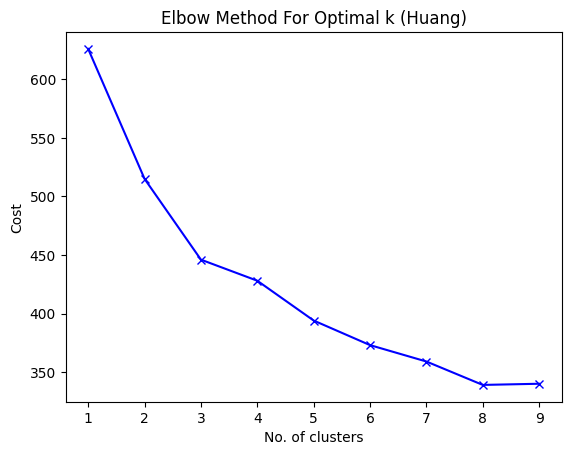

In [100]:
# Elbow curve to find optimal K (Huang)
cost_huang = []
K = range(1,10)

for num_clusters in list(K):
    kmode_huang = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode_huang.fit_predict(global_feature)
    cost_huang.append(kmode_huang.cost_)

plt.plot(K, cost_huang, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k (Huang)')
plt.show()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 626.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14, cost: 514.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 446.0
Run 1, iteration: 2/100, moves: 10, cost: 446.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 432.0
Run 1, iteration: 2/100, moves: 6, cost: 432.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializ

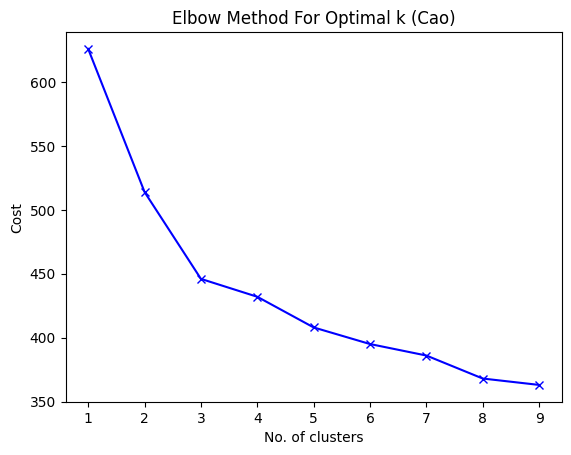

In [103]:
# Elbow curve to find optimal K (Cao)
cost_cao = []
K = range(1,10)

for num_clusters in list(K):
    kmode_cao = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode_cao.fit_predict(global_feature)
    cost_cao.append(kmode_cao.cost_)

plt.plot(K, cost_cao, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k (Cao)')
plt.show()

**Conclusion:**
1. Number of clusters    : 3
2. Initialization method : Cao


# 2. Select K-Mode initialization method: Huang, Cao (Preferred*)

In [152]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
global_fitcluster_cao = km_cao.fit_predict(global_feature)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 446.0
Run 1, iteration: 2/100, moves: 10, cost: 446.0


In [153]:
global_fitcluster_cao

array([1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=uint16)

In [157]:
global_cluster_centroids = pd.DataFrame(km_cao.cluster_centroids_)
global_cluster_centroids.columns = global_feature.columns
global_cluster_centroids


,Playing Games,Game Duration,Game Time,Hamper Sleep,Headache,Stress,Depression,Attention Level,Academics
0,Yes,<2 hours,Mid-Night,No,No,No,No,Average,Good
1,Yes,<2 hours,Evening,Sometimes,Sometimes,Sometimes,Sometimes,Good,Good
2,Yes,<2 hours,Mid-Night,Yes,Yes,Yes,Yes,Average,Good


From the results above, we can identify 3 major groups of students:

1. GOOD     : Late-Night Gamer NOT AFFECTED by depression. (cluster = 0)
2. AVERAGE  : Evening Gamer with moderate physical/mental health. (cluster = 1)
3. BAD      : Late-Night Gamer AFFECTED by depression. (cluster = 2)


In [174]:
# Turn clustering results (global_fitcluster_cao) into dataframe
global_fitcluster_cao_df = pd.DataFrame(global_fitcluster_cao)
global_fitcluster_cao_df.columns = ['Cluster']


# Append predicted clustering results to global_feature's copy, global_feature_clustered
global_feature_clustered =  global_feature.copy()
global_feature_clustered['Cluster'] = global_fitcluster_cao_df
global_feature_clustered


,Playing Games,Game Duration,Game Time,Hamper Sleep,Headache,Stress,Depression,Attention Level,Academics,Cluster
0,Sometimes,<2 hours,Mid-Night,Sometimes,Sometimes,Yes,Yes,Good,Good,1
1,Yes,<2 hours,Mid-Night,Sometimes,Yes,No,Yes,Good,Good,2
2,Yes,<2 hours,Mid-Night,No,No,No,No,Good,Good,0
3,Sometimes,<2 hours,Evening,No,Sometimes,Yes,Yes,Average,Average,2
4,Yes,<2 hours,Mid-Night,Sometimes,Sometimes,No,Sometimes,Average,Good,0
...,...,...,...,...,...,...,...,...,...,...
144,Yes,<2 hours,Afternoon,No,Yes,No,No,Good,Good,0
145,Yes,<2 hours,Afternoon,Yes,Yes,No,No,Bad,Average,0
146,Yes,<2 hours,Afternoon,No,No,No,Yes,Good,Good,0
147,Yes,<2 hours,Evening,No,No,Sometimes,Sometimes,Good,Good,1


# Repeat Clustering with depression_positive

1. Find optimal K, which appears to be K = 4
2. Conduct clustering
3. Analyze results

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 362.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 281.0
Run 1, iteration: 2/100, moves: 5, cost: 281.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 264.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 244.0
Run 1, iteration: 2/100, moves: 4, cost: 240.0
Run 1, iteration: 3/100, moves: 2, cost: 240.0
Initialization method and algorithm are determi

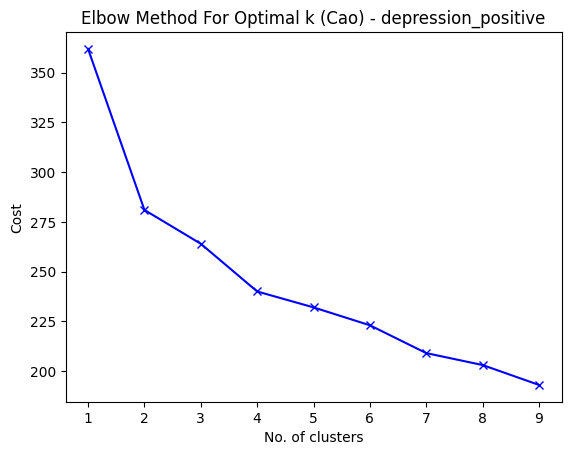

In [138]:
# Elbow curve to find optimal K (Cao) - depression_positive
cost_cao = []
K = range(1,10)

for num_clusters in list(K):
    kmode_cao = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode_cao.fit_predict(depression_positive)
    cost_cao.append(kmode_cao.cost_)

plt.plot(K, cost_cao, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k (Cao) - depression_positive')
plt.show()

In [158]:
# K-mode, clusters = 4, depression_positive
km_cao_depression_positive = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
depression_positive_fitcluster_cao = km_cao_depression_positive.fit_predict(depression_positive)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 244.0
Run 1, iteration: 2/100, moves: 4, cost: 240.0
Run 1, iteration: 3/100, moves: 2, cost: 240.0


In [160]:
depression_positive_fitcluster_cao

array([0, 0, 1, 0, 0, 1, 2, 3, 3, 0, 0, 2, 3, 0, 3, 0, 3, 0, 1, 3, 0, 0,
       2, 3, 2, 3, 3, 1, 1, 1, 1, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1,
       0, 1, 1, 3, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2], dtype=uint16)

In [162]:
depression_cluster_centroids = pd.DataFrame(km_cao_depression_positive.cluster_centroids_)
depression_cluster_centroids.columns = depression_positive.columns
depression_cluster_centroids

,Playing Games,Game Duration,Game Time,Hamper Sleep,Headache,Stress,Depression,Attention Level,Academics
0,Yes,<2 hours,Mid-Night,Sometimes,Sometimes,Sometimes,Sometimes,Good,Good
1,Sometimes,<2 hours,Evening,No,Yes,Yes,Yes,Average,Good
2,Yes,3-4 hours,Mid-Night,No,No,No,Yes,Excellent,Average
3,Yes,<2 hours,Mid-Night,Yes,Yes,Yes,Yes,Bad,Average


#Repeat Clustering with time_management


1. Find optimal K, which appears to be K = 4
2. Conduct clustering
3. Analyze results

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 190.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 173.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 155.0
Run 1, iteration: 2/100, moves: 1, cost: 155.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 143.0
Run 1, iteration: 2/100, moves: 0, cost: 143.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing

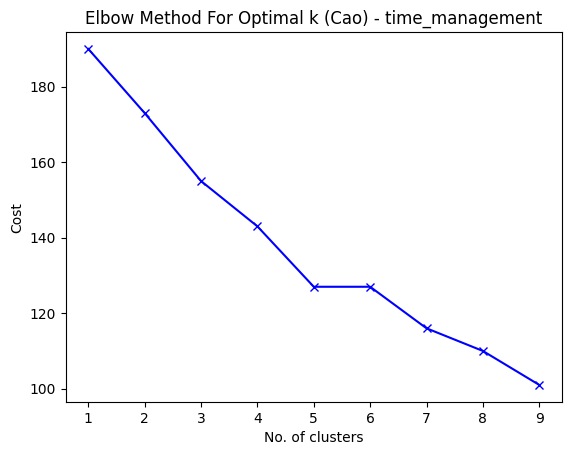

In [167]:
# Elbow curve to find optimal K (Cao) - time_management (depression : no)
cost_cao = []
K = range(1,10)

for num_clusters in list(K):
    kmode_cao = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode_cao.fit_predict(time_management)
    cost_cao.append(kmode_cao.cost_)

plt.plot(K, cost_cao, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k (Cao) - time_management')
plt.show()

In [170]:
# K-mode, clusters = 5, tm (short for time_management)

km_cao_tm = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
tm_fitcluster_cao = km_cao_tm.fit_predict(time_management)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 127.0
Run 1, iteration: 2/100, moves: 2, cost: 127.0


In [171]:
tm_fitcluster_cao

array([4, 2, 0, 0, 1, 2, 2, 2, 0, 0, 4, 2, 1, 4, 2, 2, 0, 0, 0, 4, 0, 0,
       1, 0, 3, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 1, 4, 0, 0, 1, 0, 2, 4, 4, 0, 0, 3, 4, 0, 3, 0, 0, 0, 2, 3],
      dtype=uint16)

In [172]:
# tm : short for time_management
tm_cluster_centroids = pd.DataFrame(km_cao_tm.cluster_centroids_)
tm_cluster_centroids.columns = time_management.columns
tm_cluster_centroids

,Playing Games,Game Duration,Game Time,Hamper Sleep,Headache,Stress,Depression,Attention Level,Academics
0,Yes,<2 hours,Evening,No,No,No,No,Average,Good
1,Sometimes,<2 hours,Mid-Night,Sometimes,Sometimes,Sometimes,No,Good,Excellent
2,Sometimes,<2 hours,Afternoon,No,No,No,No,Good,Good
3,Yes,<2 hours,Afternoon,Yes,Yes,Yes,No,Average,Average
4,Yes,<2 hours,Mid-Night,No,No,No,No,Good,Good


# Analyzing/Visualizing Results

**1. (Global Features) Depression Clustering Results**

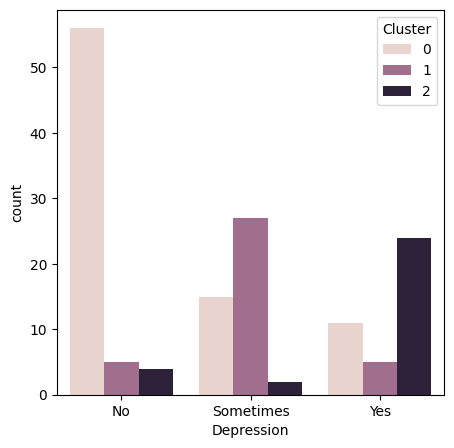

In [176]:
# Depression ---- Global Features
plt.subplots(figsize = (5,5))
sns.countplot(x=global_feature_clustered['Depression'],order=global_feature_clustered['Depression'].value_counts().index,hue=global_feature_clustered['Cluster'])
plt.show()

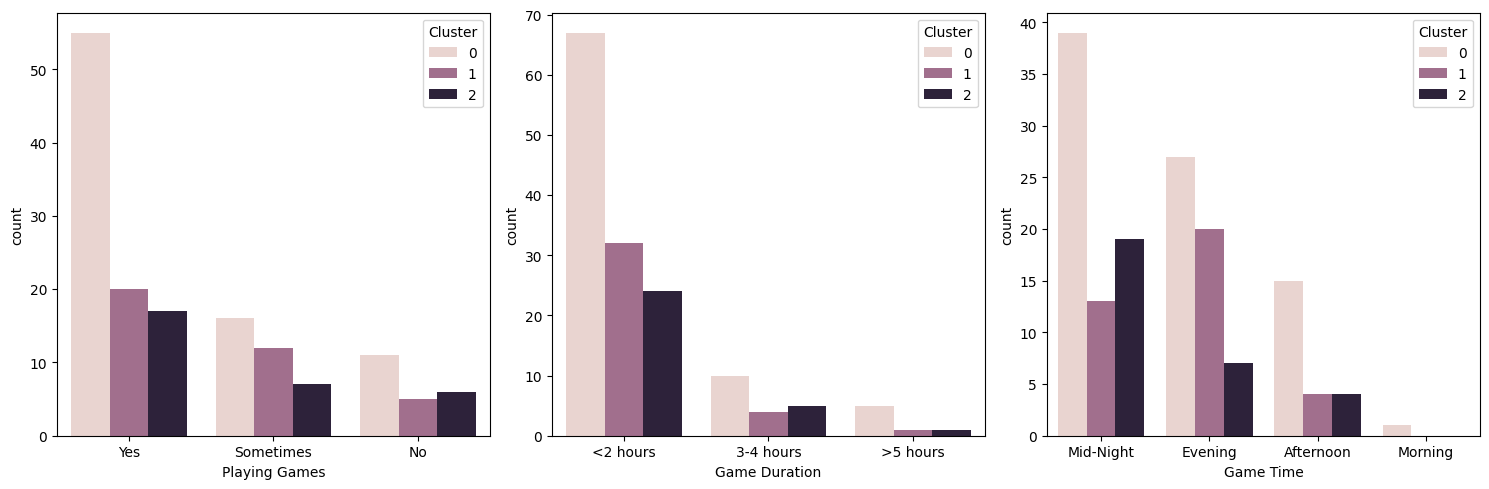

In [184]:
# Playing Games, Game Time, Game Duration ---- Game Related Global Features

f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=global_feature_clustered['Playing Games'],order=global_feature_clustered['Playing Games'].value_counts().index,hue=global_feature_clustered['Cluster'],ax=axs[0])
sns.countplot(x=global_feature_clustered['Game Duration'],order=global_feature_clustered['Game Duration'].value_counts().index,hue=global_feature_clustered['Cluster'],ax=axs[1])
sns.countplot(x=global_feature_clustered['Game Time'],order=global_feature_clustered['Game Time'].value_counts().index,hue=global_feature_clustered['Cluster'],ax=axs[2])


plt.tight_layout()
plt.show()

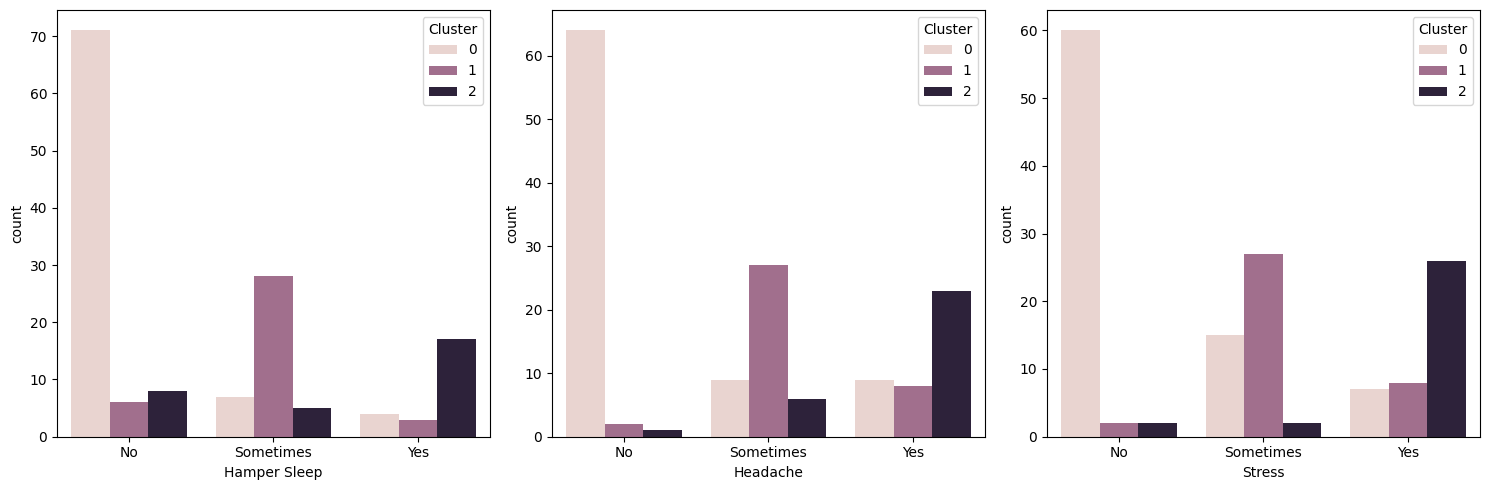

In [185]:
# Hamper Sleep, Headache, Stress ---- Physical Health Related Global Features

f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=global_feature_clustered['Hamper Sleep'],order=global_feature_clustered['Hamper Sleep'].value_counts().index,hue=global_feature_clustered['Cluster'],ax=axs[0])
sns.countplot(x=global_feature_clustered['Headache'],order=global_feature_clustered['Headache'].value_counts().index,hue=global_feature_clustered['Cluster'],ax=axs[1])
sns.countplot(x=global_feature_clustered['Stress'],order=global_feature_clustered['Stress'].value_counts().index,hue=global_feature_clustered['Cluster'],ax=axs[2])

plt.tight_layout()
plt.show()

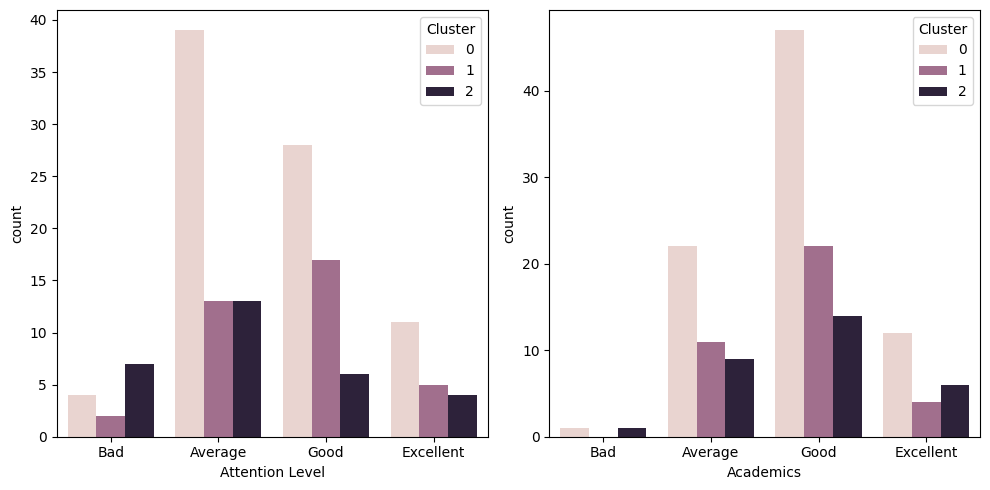

In [191]:
# Attention Level, Academics ---- Academics Related Global Features

# Define the desired order for Attention Level and Academics
order_attention = ['Bad', 'Average', 'Good', 'Excellent']
order_academics = ['Bad', 'Average', 'Good', 'Excellent']

f, axs = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x=global_feature_clustered['Attention Level'],order=order_attention,hue=global_feature_clustered['Cluster'],ax=axs[0])
sns.countplot(x=global_feature_clustered['Academics'],order=order_academics,hue=global_feature_clustered['Cluster'],ax=axs[1])

plt.tight_layout()
plt.show()